In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import seaborn as sns
#import pmdarima as pm
from dateutil.relativedelta import relativedelta
import warnings
warnings.simplefilter(action='ignore')
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from numpy import median
import math
import statistics
import pickle

In [2]:
df = pd.read_csv('sales_train_validation.csv')
calendar = pd.read_csv('calendar.csv')

In [3]:
df.drop(columns=['item_id', 'dept_id','cat_id','store_id','state_id'],axis=1, inplace=True) # Drop the unnecessary columns
data = df.T  # seting the days as index for new dataframe(Data)
data.columns = df['id'] # ading product id column to Data 
data.index.name = None   # remove the name of index
data.drop(index='id',inplace=True) # remove the first row
# change the format and the freq. of index to datetime format
data.index = calendar['date'][0:1913]
data.index = pd.to_datetime(data.index)
data.index.freq= 'd'
data.index

DatetimeIndex(['2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01',
               '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-05',
               '2011-02-06', '2011-02-07',
               ...
               '2016-04-15', '2016-04-16', '2016-04-17', '2016-04-18',
               '2016-04-19', '2016-04-20', '2016-04-21', '2016-04-22',
               '2016-04-23', '2016-04-24'],
              dtype='datetime64[ns]', name='date', length=1913, freq='D')

# Verify Stationary of an Item

In [4]:
max_value =data.max().to_frame()
max_prod = max(data.max())
max_value.loc[max_value[0] == max_prod]

,0
id,
FOODS_3_090_CA_3_validation,763


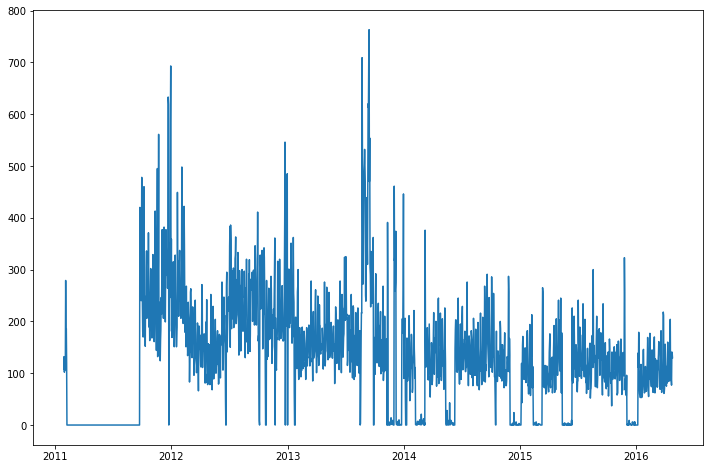

In [5]:
plt.figure(figsize=(12,8))
plt.plot(data.index,data['FOODS_3_090_CA_3_validation'])

adf is -4.1730181487191444
pvalue is 0.0007317275745300164


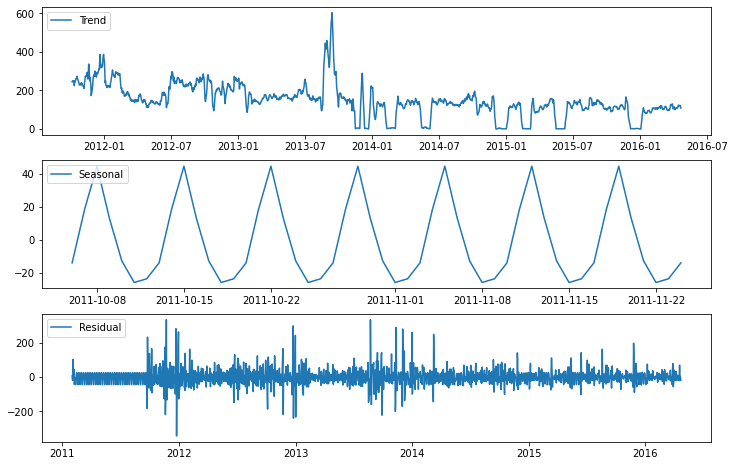

In [6]:
# Using the decompostion method...
ss_decomposition = seasonal_decompose(x=data['FOODS_3_090_CA_3_validation'])
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

#fig, ax = plt.subplots(3,1, figsize=(12,8))
fig, ax = plt.subplots(3,figsize=(12,8) )
#plt.figure(figsize=(12,5))
#plt.subplot(3,1,1)
ax[0].plot(data.index[250:],estimated_trend[250:], label='Trend')
ax[0].legend(loc='upper left')
#plt.subplot(3,1,2)
ax[1].plot(data.index[250:300],estimated_seasonal[250:300], label='Seasonal')
ax[1].legend(loc='upper left')

#plt.subplot(3,1,3)
ax[2].plot(data.index,estimated_residual, label='Residual')
ax[2].legend(loc='upper left')

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(data['FOODS_3_090_CA_3_validation'])

print(f'adf is {adf}')
print(f'pvalue is {pvalue}')

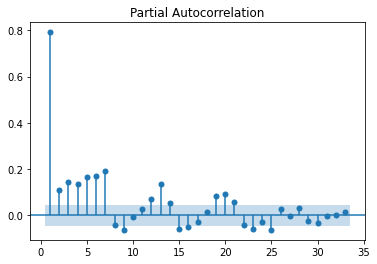

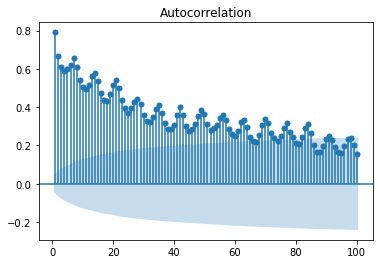

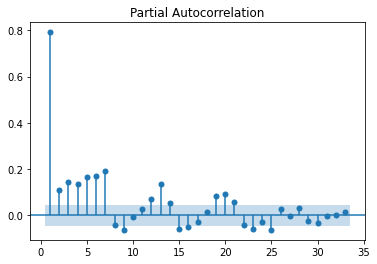

In [7]:
#plt.subplot(3,1,4)
plot_acf(data['FOODS_3_090_CA_3_validation'],lags=100, zero=False)


#plt.subplot(3,1,5)
plot_pacf(data['FOODS_3_090_CA_3_validation'], zero=False)

Original Data is not stationary so we will check by using (value at T - Value at (T-1))

adf is -9.69040472877451
pvalue is 1.1405330819669429e-16


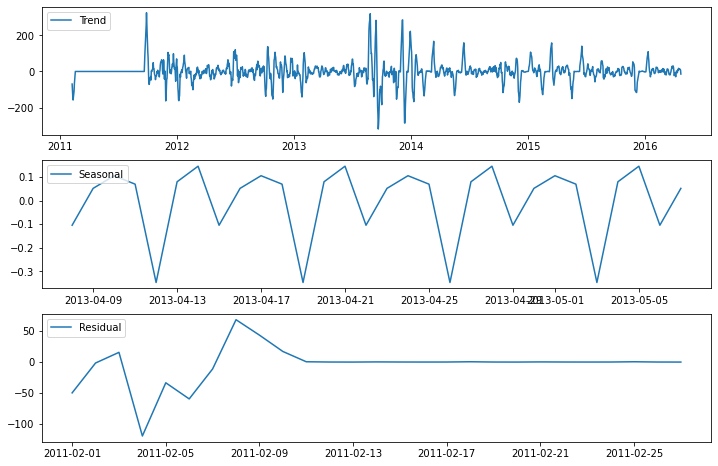

In [9]:
# diffrencing method

data['shift'] = data['FOODS_3_090_CA_3_validation'].shift(7)
data['week_lag'] = data['FOODS_3_090_CA_3_validation'] - data['shift']

ss_decomposition = seasonal_decompose(x=data['week_lag'].dropna())
lag_trend = ss_decomposition.trend
lag_seasonal = ss_decomposition.seasonal
lag_residual = ss_decomposition.resid

#fig, ax = plt.subplots(3,1, figsize=(12,8))
fig, ax = plt.subplots(3,figsize=(12,8) )
#plt.figure(figsize=(12,5))
#plt.subplot(3,1,1)
ax[0].plot(data.index[7:],lag_trend, label='Trend')
ax[0].legend(loc='upper left')

#plt.subplot(3,1,2)
ax[1].plot(data.index[800:830],lag_seasonal[800:830], label='Seasonal')
ax[1].legend(loc='upper left')

#plt.subplot(3,1,3)
ax[2].plot(data.index[:30],lag_residual[:30], label='Residual')
ax[2].legend(loc='upper left')

adf_dif, pvalue_dif,usedlag, nobs, critical_values, icbest = adfuller(data['week_lag'].dropna())

print(f'adf is {adf_dif}')
print(f'pvalue is {pvalue_dif}')

In [11]:

sell_prices = pd.read_csv('sell_prices.csv')
calendar = pd.read_csv('calendar.csv')
sales = pd.read_csv('sales_train_validation.csv')
sample_output = pd.read_csv('sample_submission.csv')


# Analyze Sales at Category Level 

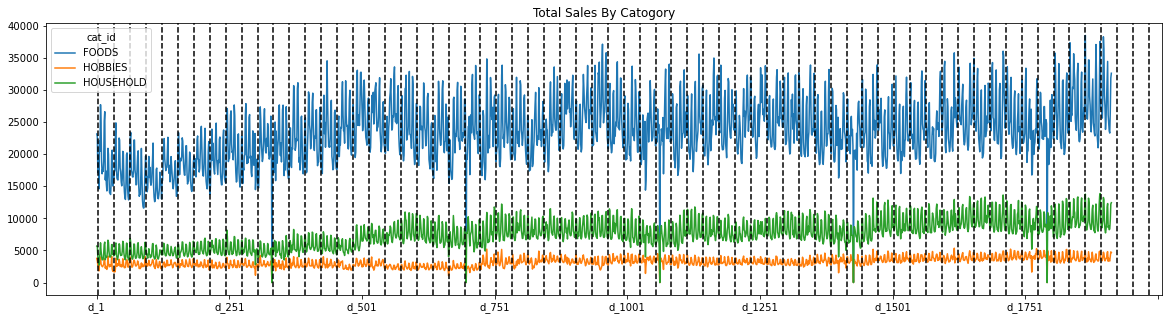

In [12]:
date_columns = [c for c in sales.columns if 'd_' in c] # select date columns
gouped_by_cat_totals = sales.groupby(['cat_id']).sum().T  #get sum and trasnpose
#print(gouped_by_cat_totals.columns)
gouped_by_cat_totals.plot(figsize=(20,5),title="Total Sales By Catogory")
cal_columns = ['d','month']
monthPosition = np.arange(3,2000,30) #Roughly
for xc in monthPosition:
    plt.axvline(x=xc, color='k', linestyle='--')
plt.show()

In [ ]:
date_columns = [c for c in sales.columns if 'd_' in c] # select date columns
gouped_by_cat_totals = sales.groupby(['cat_id']).sum().T  #get sum and trasnpose
#print(gouped_by_cat_totals.columns)
gouped_by_cat_totals.plot(figsize=(20,5),title="Total Sales By Catogory")
cal_columns = ['d','month']
monthPosition = np.arange(3,2000,30) #Roughly
for xc in monthPosition:
    plt.axvline(x=xc, color='k', linestyle='--')
plt.show()

In [97]:
gouped_by_cat_totals.head()

cat_id,FOODS,HOBBIES,HOUSEHOLD
d_1,23178,3764,5689
d_2,22758,3357,5634
d_3,17174,2682,3927
d_4,18878,2669,3865
d_5,14603,1814,2729


In [146]:
gouped_by_cat_totals.tail(60)

cat_id,FOODS,HOBBIES,HOUSEHOLD
d_1854,22406,3314,8895
d_1855,24208,3957,9484
d_1856,31067,4389,12431
d_1857,32834,4884,13197
d_1858,24087,3449,9723
d_1859,23458,3513,9565
d_1860,25150,3813,9495
d_1861,27241,3860,10358
d_1862,25878,3703,9744
d_1863,35200,4636,12486


In [13]:
cal_columns = ['date','d','month','year','wday','event_type_1','event_type_2']
calendar_selected = calendar[cal_columns].set_index('d')
total_sales_OverCalendar = pd.concat([calendar_selected,gouped_by_cat_totals],axis=1,sort=False)

In [152]:
Train=total_sales_OverCalendar[:'d_1858']
Test=total_sales_OverCalendar['d_1859':'d_1913']

In [153]:
validate=total_sales_OverCalendar['d_1914':]

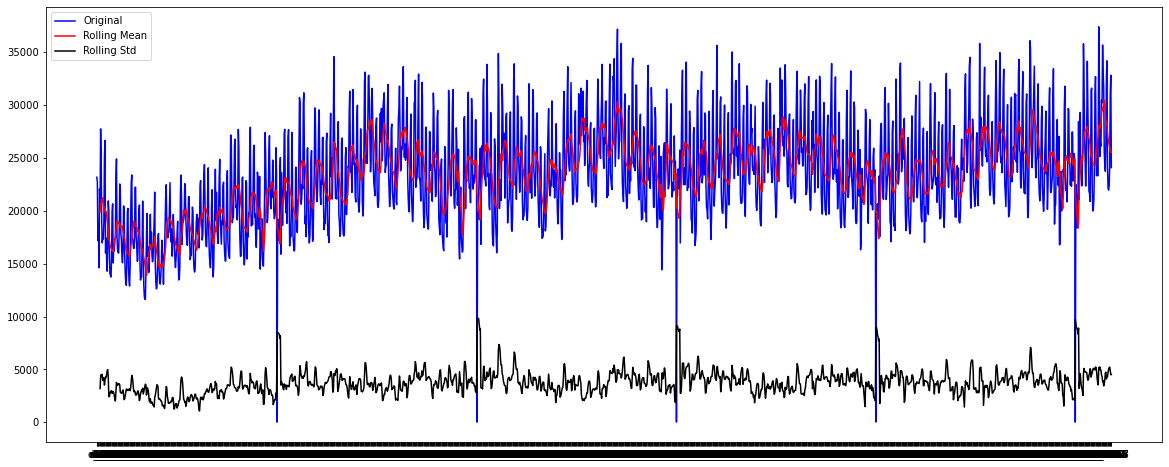

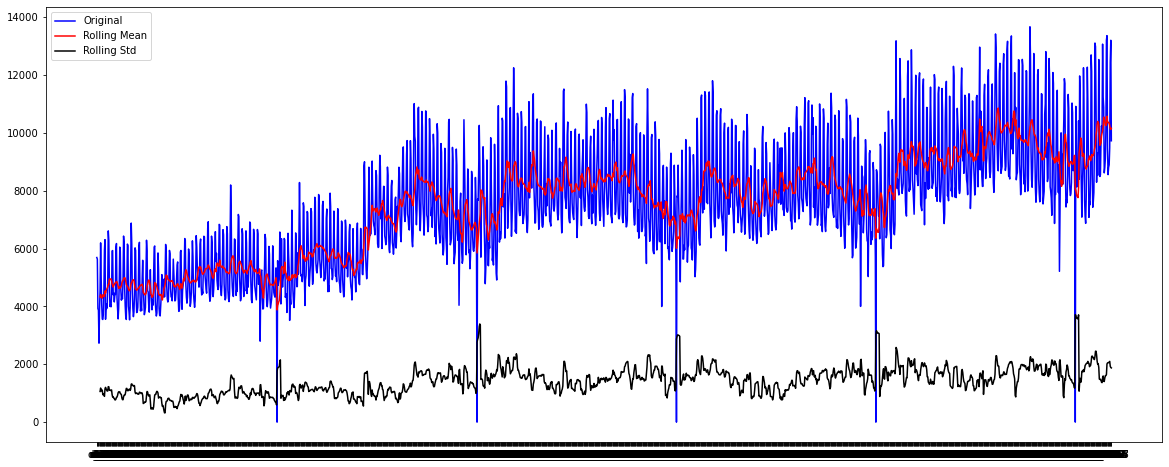

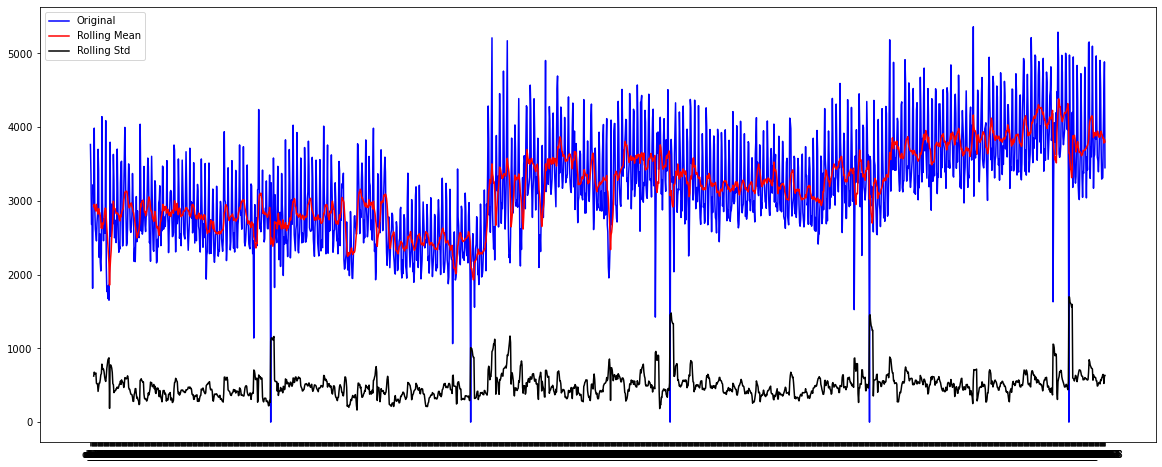

In [154]:
def plot_timeseries_stat(timeseries):
    rollingMean = timeseries.rolling(window=7,center=False).mean()
    rollingStd = timeseries.rolling(window=7,center=False).std()
    plt.figure(figsize=(20,8))
    ori = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(rollingMean,color='red',label='Rolling Mean')
    std = plt.plot(rollingStd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)

plot_timeseries_stat(Train['FOODS'])
plot_timeseries_stat(Train['HOUSEHOLD'])
plot_timeseries_stat(Train['HOBBIES'])

# Apply AdFuller Test and verify StationarityAt category Level

Test Statistic                -2.39608
p-value                        0.14285
#Lags Used                    25.00000
No of Observesations Used   1832.00000
Critical Value (1%)           -3.43392
Critical Value (5%)           -2.86312
Critical Value (10%)          -2.56761
dtype: float64


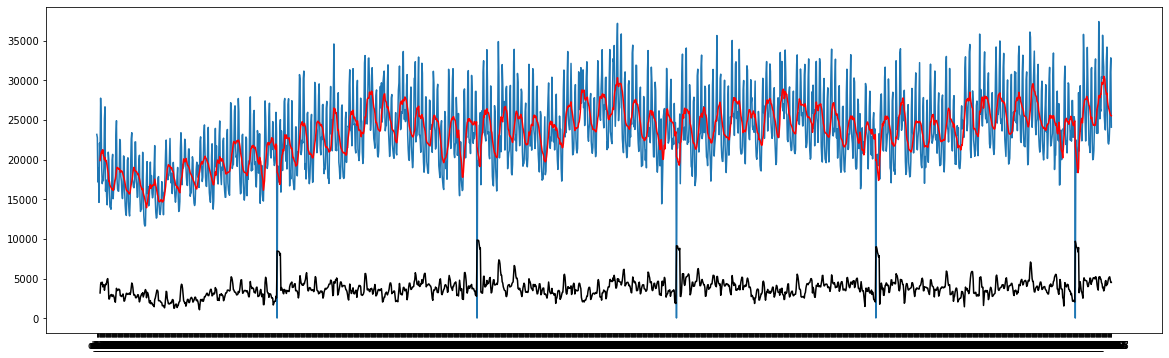

In [155]:
#Making time series stationary
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math

def test_stationarityDF(timeseries): ##Dickey-Fuller Test
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','No of Observesations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

food_Series = Train['FOODS']
food_Series.fillna(food_Series.mean(),inplace=True)
test_stationarityDF(food_Series)

movingAverage = food_Series.rolling(window=7).mean()
movingSTD = food_Series.rolling(window=7).std()
plt.figure(figsize=(20,6))
plt.plot(food_Series)
plt.plot(movingAverage,color='red')
plt.plot(movingSTD,color='black')
plt.show()

In [80]:
food_Series.tail()

d_1965   23570.27653
d_1966   23570.27653
d_1967   23570.27653
d_1968   23570.27653
d_1969   23570.27653
Name: FOODS, dtype: float64

As above test statistic is less than 1% ,5% and 10% of P-vale we perfrom Adfuller test on diffrenced data ie sale at t-sale at( t-7)

In [156]:
def difference(dataset):
    diff =[]
    size= len(dataset)
    for i in range(1,8):
        d3="d_"+str(i)
        diff.append(dataset[d3])
    for i in range(8, size+1):
        j=i-7
        d1="d_"+str(j)
        d2="d_"+str(i)
        value = dataset[d2] - dataset[d1]
        diff.append(value)
    diff_7= pd.Series(diff)
    return diff_7

In [157]:
diff=difference(food_Series)

In [158]:
diff.head(100)

0    23178.00000
1    22758.00000
2    17174.00000
3    18878.00000
4    14603.00000
         ...    
95    2544.00000
96    3098.00000
97    2553.00000
98    1903.00000
99   -3363.00000
Length: 100, dtype: float64

In [159]:
diff.index=food_Series.index

In [160]:
diff.tail()

d_1854   -1334.00000
d_1855   -2180.00000
d_1856   -1683.00000
d_1857   -1362.00000
d_1858    -111.00000
dtype: float64

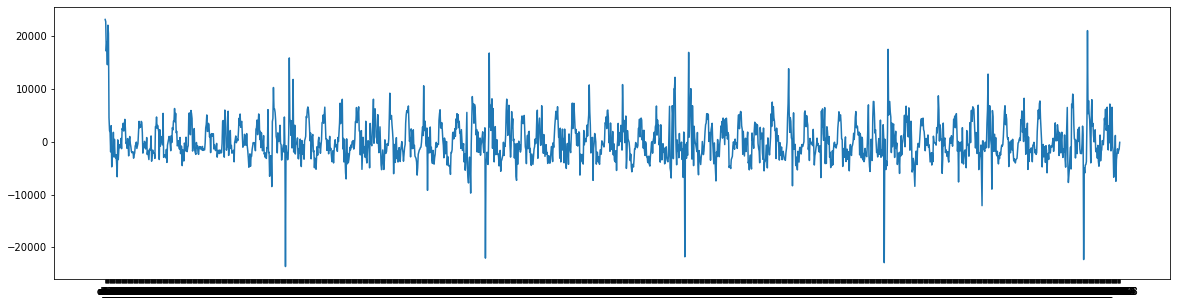

Test Statistic               -16.31716
p-value                        0.00000
#Lags Used                    25.00000
No of Observesations Used   1832.00000
Critical Value (1%)           -3.43392
Critical Value (5%)           -2.86312
Critical Value (10%)          -2.56761
dtype: float64


In [161]:
plt.figure(figsize=(20,5))
plt.plot(diff)
plt.show()
pd.set_option('display.float_format', '{:.5f}'.format)
diff.fillna(diff.mean(),inplace=True)
test_stationarityDF(diff)

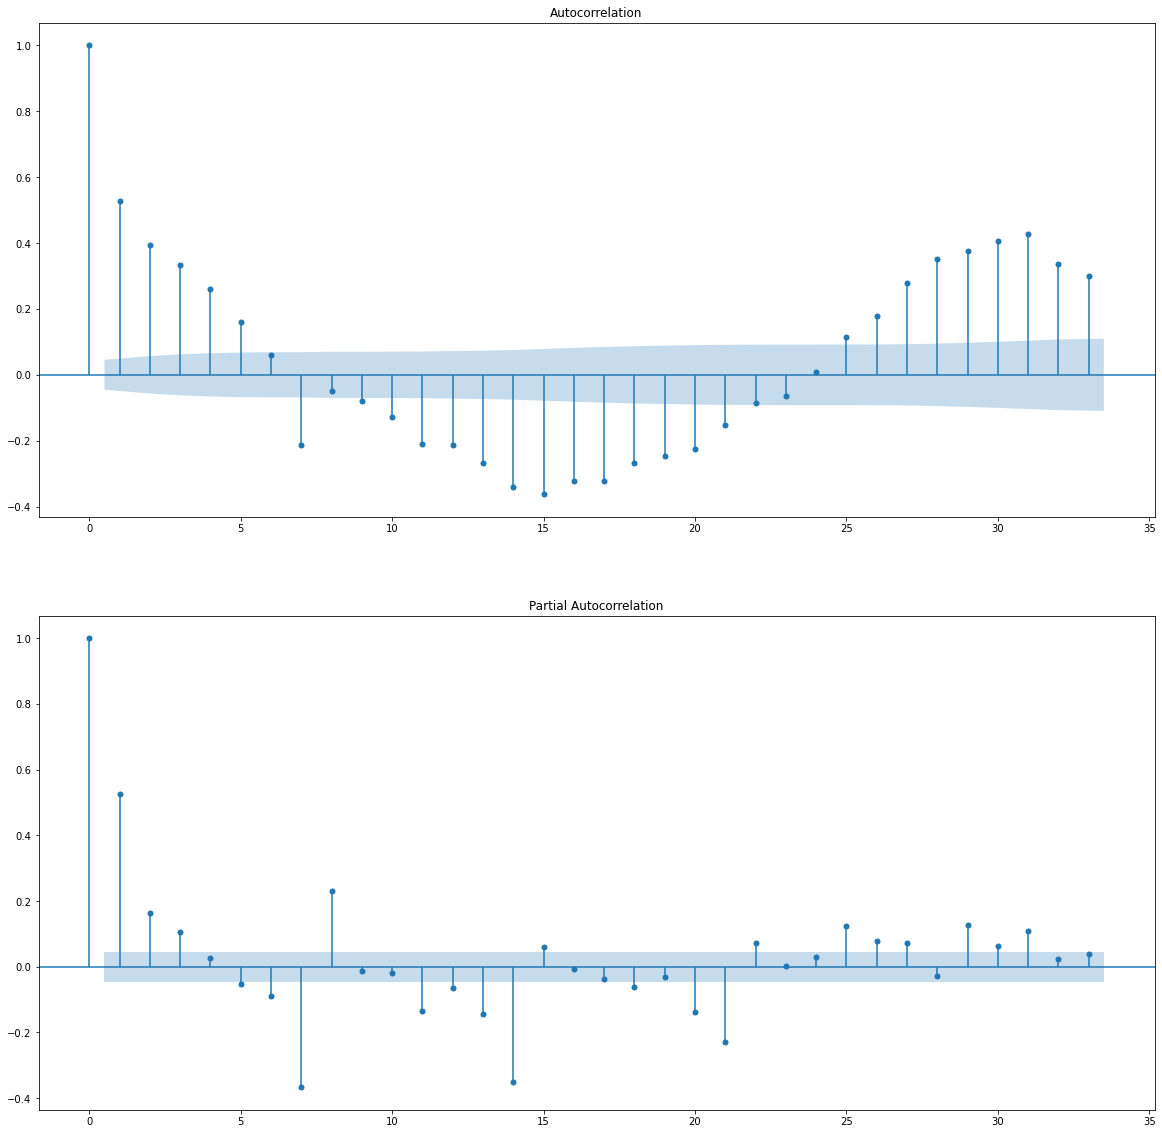

In [162]:
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(20,20))
pyplot.subplot(211)
plot_acf(diff, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(diff, ax=pyplot.gca())
pyplot.show()

FRom Above autocorrelation and Patial auto correlation we can pick 1 as P and q , as it has heighest Values correspondinlgy.

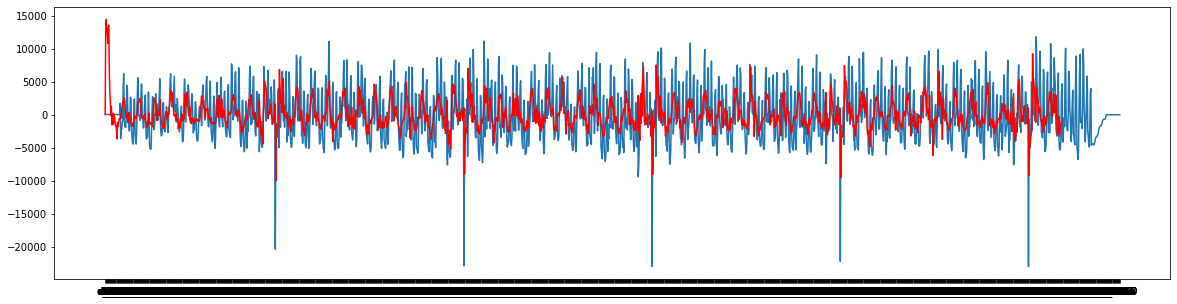

In [176]:
model = ARIMA(diff,order=(1,0,1))

results_ARIMA = model.fit(disp=-1)

pickle.dump(model, open('model', 'wb'))
plt.figure(figsize=(20,5))
plt.plot(foodSeriesDiff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.show()

In [164]:
fitted=results_ARIMA.fittedvalues
fitted.index=food_Series.index

In [165]:
def integ(dataset,food_Series):
    foodSeries_predicted=[]
    size= len(dataset)
    for i in range(1,8):
        d3="d_"+str(i)
        foodSeries_predicted.append(dataset[d3])
    for i in range(8, size+1):
        j=i-7
        d1="d_"+str(j)
        d2="d_"+str(i)
        value = dataset[d2] + food_Series[d1]
        foodSeries_predicted.append(value)
    foodSeries_predicted_7= pd.Series(foodSeries_predicted)
    return foodSeries_predicted_7

In [166]:
foodSeries_pred=integ(fitted,food_Series)

In [171]:
food_Series.tail(20)

d_1839   26112.00000
d_1840   30452.00000
d_1841   30248.00000
d_1842   35686.00000
d_1843   32998.00000
d_1844   31682.00000
d_1845   25542.00000
d_1846   24359.00000
d_1847   23740.00000
d_1848   26388.00000
d_1849   32750.00000
d_1850   34196.00000
d_1851   24198.00000
d_1852   22133.00000
d_1853   21961.00000
d_1854   22406.00000
d_1855   24208.00000
d_1856   31067.00000
d_1857   32834.00000
d_1858   24087.00000
Name: FOODS, dtype: float64

In [170]:
foodSeries_pred.tail(20)

1838   27549.04399
1839   23697.95788
1840   29949.76623
1841   40108.49190
1842   32681.02301
1843   25511.33788
1844   29326.26130
1845   26847.86162
1846   29994.59495
1847   27241.04444
1848   32980.34029
1849   30795.81954
1850   31428.34399
1851   22278.37548
1852   21753.73118
1853   21803.95460
1854   25147.74787
1855   31398.59509
1856   33017.04087
1857   23218.35184
dtype: float64

Plot Actual and Predicted values and see how much they overlap

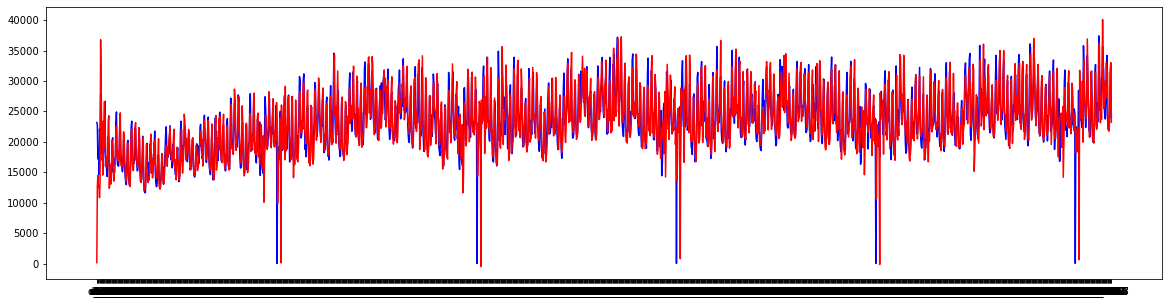

In [169]:
plt.figure(figsize=(20,5))
plt.plot(food_Series,color='blue')
plt.plot(foodSeries_pred,color='red')
plt.show()

In [200]:
def difference(dataset):
    diff =[]
    size= len(dataset)
    for i in range(1,8):
        d3="d_"+str(i)
        diff.append(dataset[d3])
    for i in range(8, size+1):
        j=i-7
        d1="d_"+str(j)
        d2="d_"+str(i)
        value = dataset[d2] - dataset[d1]
        diff.append(value)
    diff_7= np.array(diff)
    return diff_7
pred=0
def integ(Train,Test,yhat,step):
    j=1859+i
    step=str(j)
    step="d_"+step
    
    if j in range(1859,1866):
        k=j-7
        d3="d_"+str(k)
        pred=yhat+Train[d3]
    if j in range(1866, 1914):
        k=j-7
        d3="d_"+str(k)
        pred = yhat+Test[d3]
        
    return pred
predictions=[]
for i in range(len(Test)):
    # difference data
    diff = difference(Train)
    # load the model from disk
    model = ARIMA(diff, order=(1,0,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    step=i
    yhat = integ(Train,Test, yhat,step)
    predictions.append(yhat)



Error Analysis of ARIMA based Prediction

                0
count    55.00000
mean    566.49626
std    3120.63875
min   -5953.90374
25%   -1646.90374
50%     -92.90374
75%    2815.09626
max    7509.09626


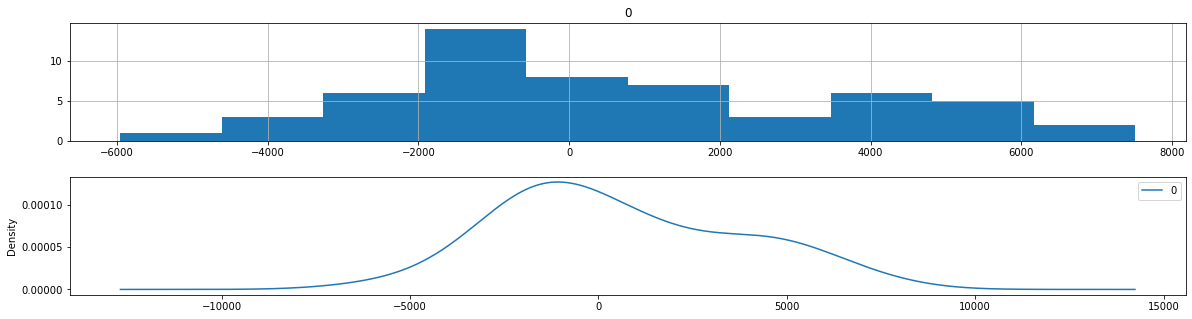

In [207]:
test = [x for x in Test] 
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [190]:
Test

d_1859   23458.00000
d_1860   25150.00000
d_1861   27241.00000
d_1862   25878.00000
d_1863   35200.00000
d_1864   38547.00000
d_1865   27978.00000
d_1866   26276.00000
d_1867   25601.00000
d_1868   25491.00000
d_1869   27897.00000
d_1870   34734.00000
d_1871   34710.00000
d_1872   29086.00000
d_1873   27703.00000
d_1874   24605.00000
d_1875   23502.00000
d_1876   26455.00000
d_1877   29999.00000
d_1878   31758.00000
d_1879   24910.00000
d_1880   24242.00000
d_1881   23262.00000
d_1882   22874.00000
d_1883   30906.00000
d_1884   37135.00000
d_1885   32236.00000
d_1886   23285.00000
d_1887   22191.00000
d_1888   21017.00000
d_1889   22127.00000
d_1890   28627.00000
d_1891   34284.00000
d_1892   37633.00000
d_1893   27025.00000
d_1894   27243.00000
d_1895   27238.00000
d_1896   25655.00000
d_1897   29449.00000
d_1898   38334.00000
d_1899   36446.00000
d_1900   29091.00000
d_1901   27424.00000
d_1902   23888.00000
d_1903   25456.00000
d_1904   28682.00000
d_1905   32007.00000
d_1906   3449